### 분산분석 (ANOVA)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

"data_ToothGrowth.csv" 사용. <br>
len = 치아의 길이. <br>
supp = 보조 영양제. 두 가지 타입 VC or OJ. <br> 
dose (mgr/day) = 투입양. 세 가지 0.5, 1.0, 2.0.

In [2]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer',encoding = 'latin1')

In [3]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   len     60 non-null     float64
 1   supp    60 non-null     object 
 2   dose    60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


#### 1). 일원 ANOVA를 적용하여 supp에 의한 그룹평균 사이에 차이가 있는지 알아본다.

In [5]:
# supp 변수의 유형 확인.
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

In [6]:
# supp 유형별 모아 둠.
x_vc = df[df.supp=='VC'].len
x_oj = df[df.supp=='OJ'].len

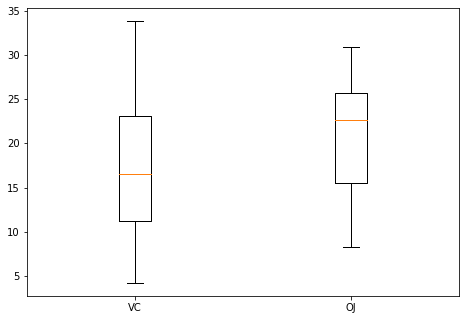

In [7]:
# 다중 상자그림 출력.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot([x_vc,x_oj],0)
ax.set_xticklabels(['VC','OJ'])
plt.show()

In [8]:
# 일원 분산분석.
res=st.f_oneway(x_oj,x_vc)
print("검정통계량  : %f " % res[0] )
print("p-value   : %f " % res[1] )

검정통계량  : 3.668253 
p-value   : 0.060393 


In [9]:
# 일원 분산분석 (다른 방법).
my_model = smf.ols('len ~ supp', data = df)
my_model = my_model.fit()
sm.stats.anova_lm(my_model)

,df,sum_sq,mean_sq,F,PR(>F)
supp,1.0,205.350000,205.350000,3.668253,0.060393
Residual,58.0,3246.859333,55.980333,NaN,NaN


그러므로, 5% 유의수준을 적용하면 그룹평균 사이에 차이가 **없다 !** 

#### 2). 일원 ANOVA를 적용하여 dose에 의한 그룹평균 사이에 차이가 있는지 알아본다.

In [10]:
# dose 변수의 유형 확인.
df.dose.unique()

array([0.5, 1. , 2. ])

In [11]:
# dose 유형별 모아 둠.
x_05 = df[df.dose==0.5].len
x_1 = df[df.dose==1.0].len
x_2 = df[df.dose==2.0].len

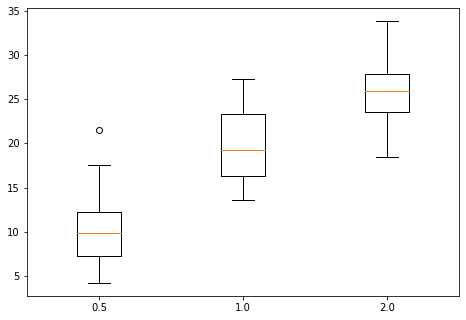

In [12]:
# 다중 상자그림 출력.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot([x_05,x_1,x_2],0)
ax.set_xticklabels(['0.5','1.0','2.0'])
plt.show()

In [13]:
# 일원 분산분석.
res=st.f_oneway(x_05,x_1,x_2)
print("검정통계량  : %f " % res[0] )
print("p-value   : %f " % res[1] )

검정통계량  : 67.415738 
p-value   : 0.000000 


In [14]:
# 일원 분산분석 (다른 방법).
df['dose_str'] = df.dose.astype(str)                           # 문자열 컬럼으로 변환.
my_model = smf.ols('len ~ dose_str', data = df)
my_model = my_model.fit()
sm.stats.anova_lm(my_model)

,df,sum_sq,mean_sq,F,PR(>F)
dose_str,2.0,2426.434333,1213.217167,67.415738,9.532727e-16
Residual,57.0,1025.775000,17.996053,NaN,NaN


그러므로, 5% 유의수준을 적용하면 그룹평균 사이에 차이가 **있다!**